In [82]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_recall_fscore_support, precision_score, recall_score

### Параметры

In [83]:
digits=4 # Количество знаков после точки

In [84]:
average = 'macro' # {‘micro’, ‘macro’, ‘samples’, ’weighted’, ‘binary’}

### Результаты 

In [85]:
y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [86]:
y_pred = [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]

In [87]:
labels = sorted(set(y_true))
labels

[0, 1]

### Classification report

In [101]:
print(classification_report(y_true, y_pred, labels=labels, digits=digits, output_dict=False))

              precision    recall  f1-score   support

           0     0.7500    0.6000    0.6667         5
           1     0.6667    0.8000    0.7273         5

    accuracy                         0.7000        10
   macro avg     0.7083    0.7000    0.6970        10
weighted avg     0.7083    0.7000    0.6970        10



### F1-score

In [89]:
# Усредненная f1-score
print(f'{average} f1-score = {f1_score(y_true, y_pred, average=average):.{digits}}')

macro f1-score = 0.697


In [90]:
# f1-score для одного класса
label = 0
print(f'f1-score for label {label} = {f1_score(y_true, y_pred, labels=[label], average=average):.{digits}}')

f1-score for label 0 = 0.6667


### Precision

In [91]:
# Усредненная precision
print(f'{average} precision = {precision_score(y_true, y_pred, average=average):.{digits}}')

macro precision = 0.7083


In [92]:
# precision для одного класса
label = 0
print(f'precision for label {label} = {precision_score(y_true, y_pred, labels=[label], average=average):.{digits}}')

precision for label 0 = 0.75


### Recall

In [93]:
# Усредненная recall
print(f'{average} recall = {recall_score(y_true, y_pred, average=average):.{digits}}')

macro recall = 0.7


In [94]:
# recall для одного класса
label = 0
print(f'recall for label {label} = {recall_score(y_true, y_pred, labels=[label], average=average):.{digits}}')

recall for label 0 = 0.6


### Accuracy

In [95]:
print(f'accuracy = {accuracy_score(y_true, y_pred)}')

accuracy = 0.7


### precision_recall_fscore_support

In [96]:
# precision / recall / f1-score / support по классам
precision_recall_fscore_support(y_true, y_pred)

(array([0.75      , 0.66666667]),
 array([0.6, 0.8]),
 array([0.66666667, 0.72727273]),
 array([5, 5], dtype=int64))

In [97]:
# Усреднённые precision / recall / f1-score / support
precision_recall_fscore_support(y_true, y_pred, average=average)

(0.7083333333333333, 0.7, 0.6969696969696968, None)

### Матрица ошибок (confusion matrix)

В [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) строки матрицы ошибок соответствуют истинным меткам, столбцы - предсказанным.  
В англоязычной [Википедии](https://en.wikipedia.org/wiki/Confusion_matrix) - наоборот: строки соответствуют предсказанным меткам, столбцы - истинным.

In [98]:
# Метки выводятся в матрице в отсортированном порядке
conf_matrix = confusion_matrix(y_true, y_pred, normalize=None) # normalize: {‘true’, ‘pred’, ‘all’}, default=None
conf_matrix

array([[3, 2],
       [1, 4]], dtype=int64)

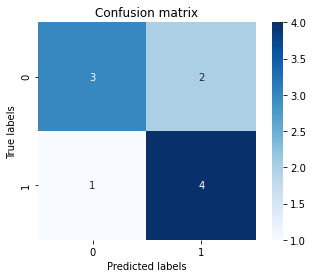

In [99]:
# Выбираем Colormap: https://matplotlib.org/stable/tutorials/colors/colormaps.html
colormap = plt.cm.Blues

sns.heatmap(conf_matrix, square=True, annot=True, cmap=colormap, cbar=True, xticklabels = labels, yticklabels = labels)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()